<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/7_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar archivo csv desde seaborn
df=sns.load_dataset(name='car_crashes')
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<Axes: xlabel='alcohol', ylabel='total'>

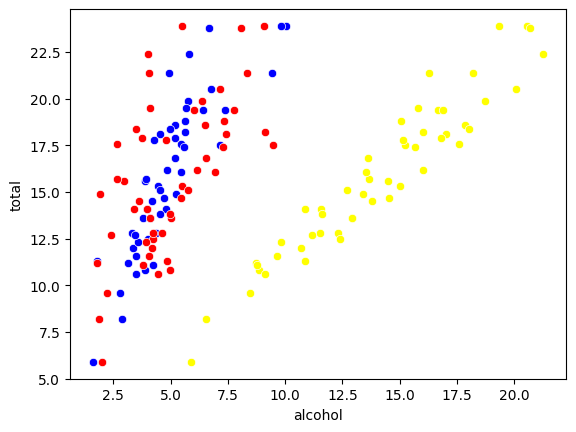

In [3]:
from turtle import color


sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
sns.scatterplot(x='speeding', y='total', color="red", data=df)
sns.scatterplot(x='no_previous', y='total', color="yellow", data=df)

In [4]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['alcohol', 'speeding','no_previous']]
Var_Dep= df['total']

In [5]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [6]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [7]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [8]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol', 'speeding', 'no_previous'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.62534291, 0.01978015, 0.81582765]),
 'rank_': 3,
 'singular_': array([29.90574925, 11.29147728,  6.31241828]),
 'intercept_': np.float64(1.2098448339476633)}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [9]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.9420360646171962

In [10]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['alcohol', 'speeding', 'no_previous']])
y_pred

array([17.15185476, 18.06680162, 19.162818  , 22.29240789, 12.10711294,
       14.23117758, 10.96441552, 17.45502182,  7.0590782 , 18.25746949,
       15.54333809, 18.3045786 , 16.32596017, 14.04737427, 15.14914069,
       14.86049884, 16.31984548, 17.63682962, 21.97218968, 14.50410463,
       13.89114927,  8.39371373, 12.60307546,  9.88658605, 19.03250198,
       15.80316304, 22.10306376, 15.44957104, 16.1317819 , 11.32113418,
       10.33343657, 19.09670399, 11.54604174, 15.69801291, 24.36428996,
       13.71843006, 20.20553078, 12.77287191, 17.98432454, 11.07618418,
       23.31083081, 18.94351647, 17.71315643, 19.7429058 , 11.2866749 ,
       14.38244015, 12.51956498, 10.92244042, 22.42971827, 13.61299835,
       17.61216849])

In [11]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,17.151855,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.066802,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,19.162818,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.292408,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.107113,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,14.231178,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.964416,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,17.455022,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,7.059078,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,18.257469,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


<Axes: xlabel='speeding', ylabel='total'>

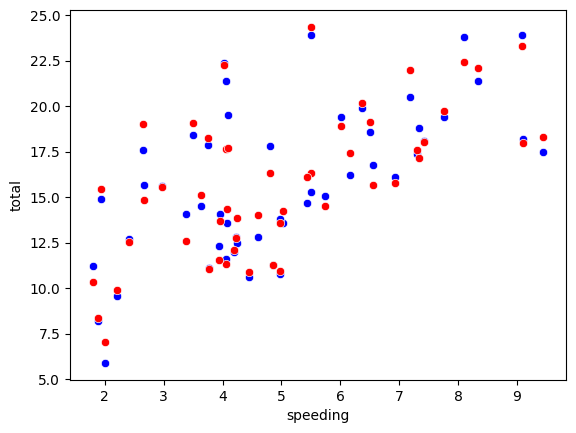

In [13]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='speeding', y='total', color="blue", data=df)
sns.scatterplot(x='speeding', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [14]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.9420360646171962

In [15]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.9705854236579057)